# Country K Means

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Loading the data

In [14]:
data=pd.read_csv("29588934-3.01.Country-clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

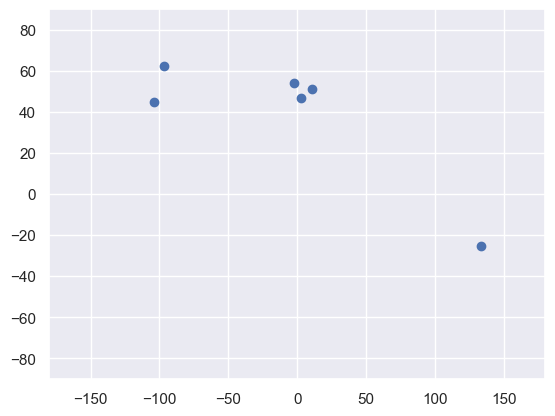

In [15]:
plt.scatter(data["Longitude"],data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selelcting a variable

In [16]:
x=data.iloc[:,1:3]  ## First argument is row second is column
print(x)

   Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11


## Clustering

In [24]:
kmeans=KMeans(3) # Here 3 -> no of clusters

In [18]:
kmeans.fit(x)

C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [19]:
kmeans.get_params(deep=True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Clustering results

In [20]:
identified_clusters=kmeans.fit_predict(x)
print(identified_clusters)

[0 0 0 0 0 1]


C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


From this first 5 observation are in cluster 1
Last observation is in cluster 2

In [21]:
data["Cluster"]=identified_clusters
data

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


## Lets plot the cluster

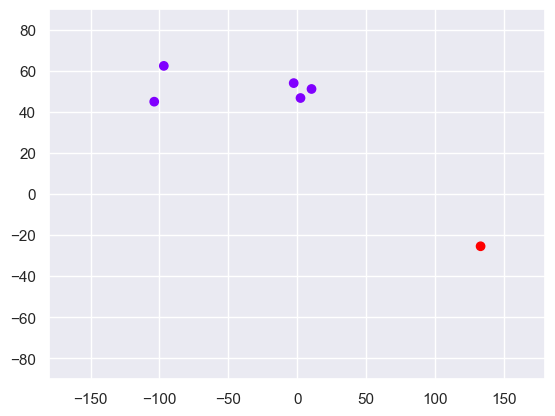

In [22]:
plt.scatter(data["Longitude"],data["Latitude"],c=data["Cluster"],cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## WCSS
within cluster sum of squares
We need a model with less wcss and minimum no of cluster

In [23]:
kmeans.inertia_

13205.758119999999

## Elbow method
using this we can find no of cluster required

In [26]:
wcss=[]
for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    kmeans_wcss=kmeans.inertia_
    wcss.append(kmeans_wcss)
wcss

C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Magesh\anaconda3\lib\site-packages\sklearn\

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

In [27]:
cluster_no=range(1,7)

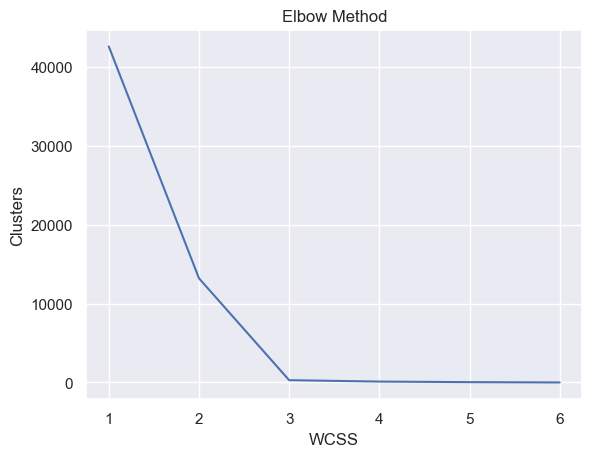

In [30]:
plt.plot(cluster_no,wcss)
plt.xlabel("WCSS")
plt.ylabel("Clusters")
plt.title("Elbow Method")
plt.show()

We can choose both 2 and 3 as no of cluster but 3 is more optimal